<a href="https://colab.research.google.com/github/Sanil2108/machine-learning-and-computer-vision/blob/master/Traffic_sign_convolutional/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
import pickle
from keras.layers.convolutional import Conv2D, MaxPooling2D
np.random.seed(0)
import pandas as pd
import random

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git 

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print(X_train.shape)

(34799, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_val.shape[0] == y_val.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

assert(X_train.shape[1:] == (32, 32, 3))
assert(X_test.shape[1:] == (32, 32, 3))
assert(X_val.shape[1:] == (32, 32, 3))

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [0]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0,0.5,'Number of images')

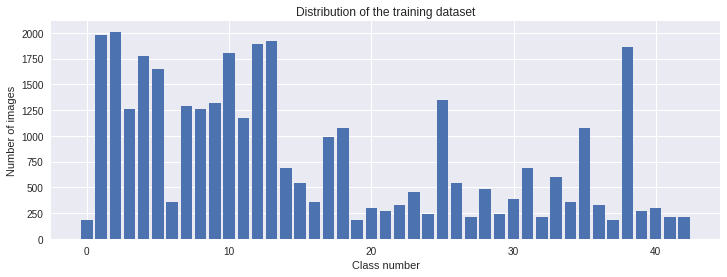

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
import cv2

(32, 32, 3)
36


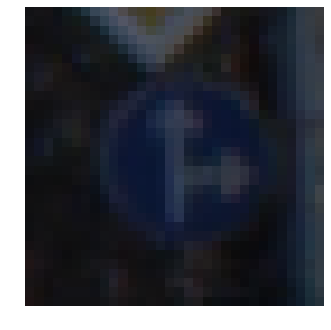

In [0]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img
  

(-0.5, 31.5, 31.5, -0.5)

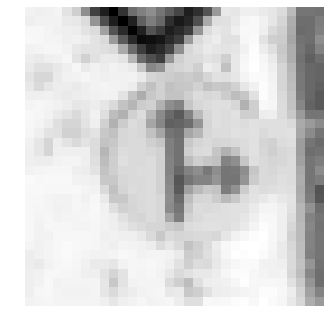

In [0]:
plt.imshow(grayscale(X_train[1000]))
plt.axis('off')

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

In [0]:
def preprocessing(img):
  img = equalize(grayscale(img))
  img = img/255
  return img

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                   height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range=0.1,
                   rotation_range=10)

datagen.fit(X_train)

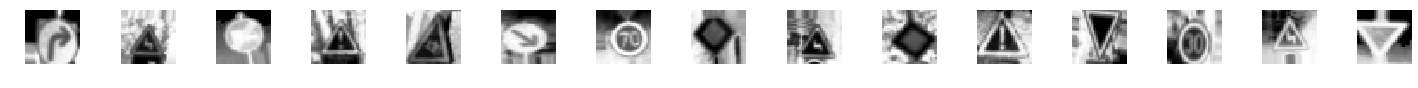

In [0]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

X_batch_reshaped = X_batch.reshape(20, 32, 32)

fig, axes = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axes[i].imshow(X_batch_reshaped[i])
  axes[i].axis('off')

In [0]:
X_test.shape

(12630, 32, 32, 1)

In [0]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [0]:
model = modified_model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 30)          0         
__________

In [0]:
# history = model.fit(X_train, y_train, epochs=10, batch_size=400, validation_data = (X_val, y_val), verbose=1, shuffle=1)
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 55s 28ms/step - loss: 1.2300 - acc: 0.6369 - val_loss: 0.2061 - val_acc: 0.9361
Epoch 2/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.3991 - acc: 0.8755 - val_loss: 0.0559 - val_acc: 0.9855
Epoch 3/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2761 - acc: 0.9137 - val_loss: 0.0406 - val_acc: 0.9891
Epoch 4/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2310 - acc: 0.9289 - val_loss: 0.0500 - val_acc: 0.9864
Epoch 5/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1994 - acc: 0.9391 - val_loss: 0.0470 - val_acc: 0.9866
Epoch 6/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.1752 - acc: 0.9461 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 7/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1574 - acc: 0.9519 - val_loss: 0.0240 - val_acc: 0.9941
Epoch 8/10
2000/2000 [==========================

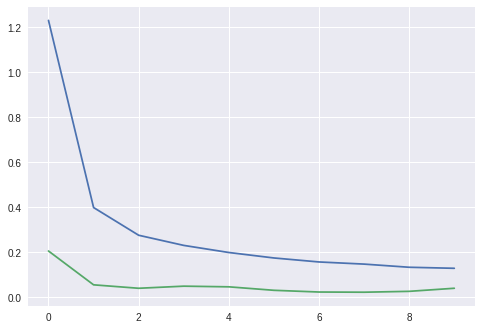

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

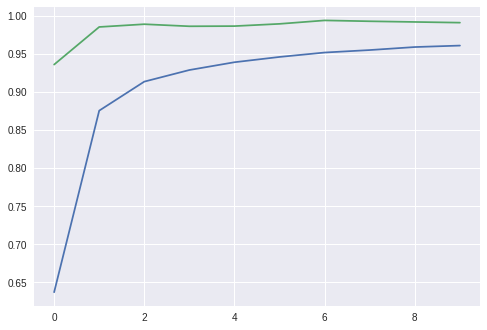

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.11627804293963279, 0.9703087886457678]


(32, 32)
predicted sign: [30]


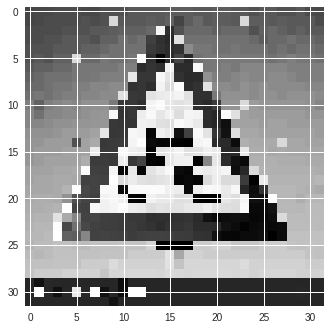

In [0]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))